# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from numpy import zeros, newaxis
%matplotlib inline

# TODO: fill this in based on where you saved the training and testing data
training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

/root/miniconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/miniconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
print (X_train[0].shape)
#print(X_train[0].T)

(32, 32, 3)


In [3]:
### rough
### rgb2gray

print(X_train[0])
image = np.mean(X_train[0], axis = 2)
image = image[:,:, newaxis]
print (image.shape)

im = np.zeros((3,3,3))



#plt.imshow(X_train[0])
#plt.show()

#plt.imshow(image,cmap = 'gray')
#plt.show()

[[[ 75  78  80]
  [ 74  76  78]
  [ 83  84  83]
  ..., 
  [ 67  74  73]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 82  83  85]
  [ 80  80  82]
  [ 87  86  83]
  ..., 
  [ 73  77  77]
  [ 75  77  75]
  [ 79  79  77]]

 [[ 79  79  81]
  [ 84  83  85]
  [ 91  88  89]
  ..., 
  [ 72  74  72]
  [ 74  75  71]
  [ 78  78  74]]

 ..., 
 [[126 128 133]
  [118 123 128]
  [108 117 120]
  ..., 
  [ 96  96  90]
  [ 99 101  94]
  [ 99 103  99]]

 [[ 90  94  98]
  [ 91  97 103]
  [ 77  87  92]
  ..., 
  [104 104  97]
  [107 111 102]
  [ 95 103  97]]

 [[ 85  84  87]
  [ 93  99 104]
  [ 69  80  85]
  ..., 
  [101 102  94]
  [ 98 101  90]
  [ 90  97  89]]]
(32, 32, 1)


In [4]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

#print (X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


0


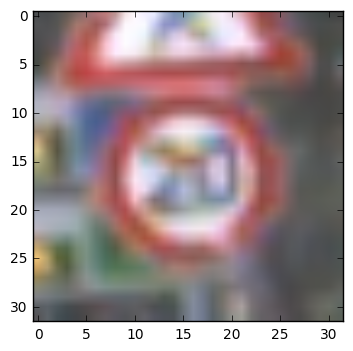

1


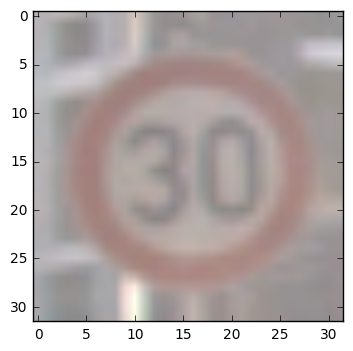

2


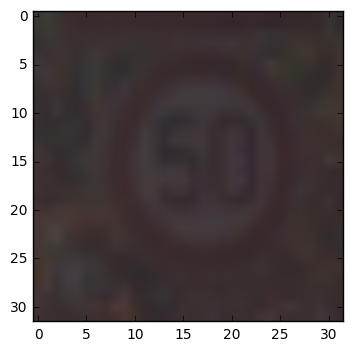

3


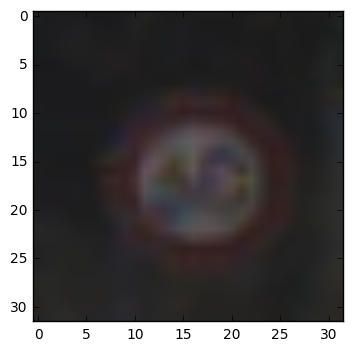

4


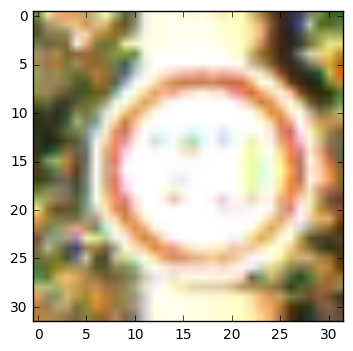

5


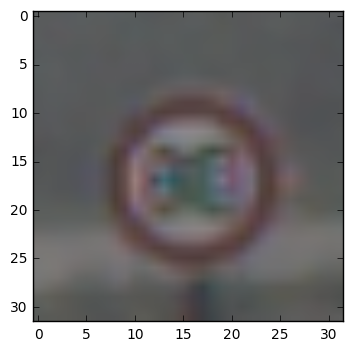

6


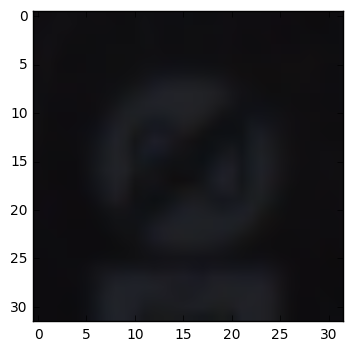

7


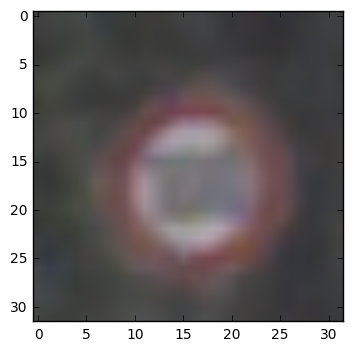

8


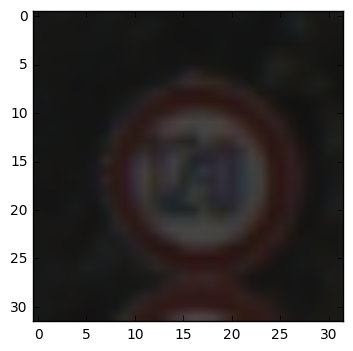

9


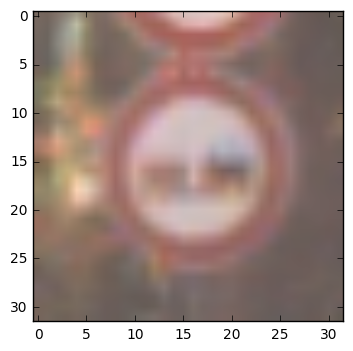

10


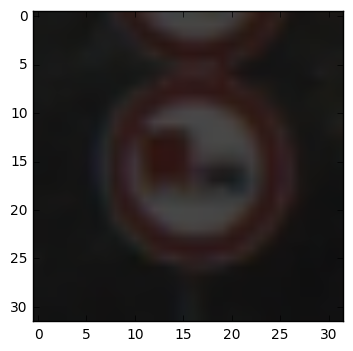

11


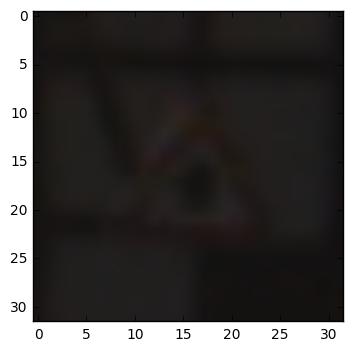

12


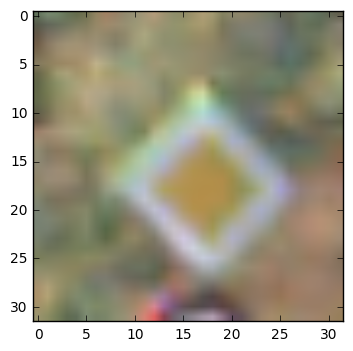

13


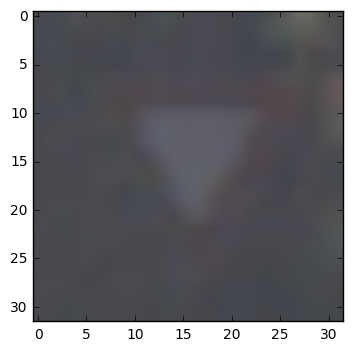

14


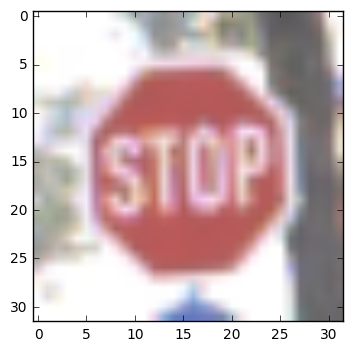

15


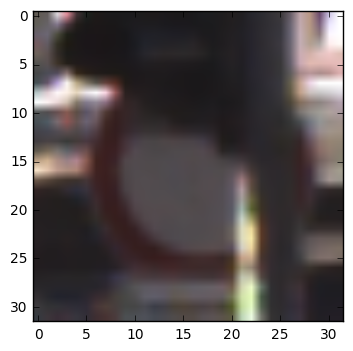

16


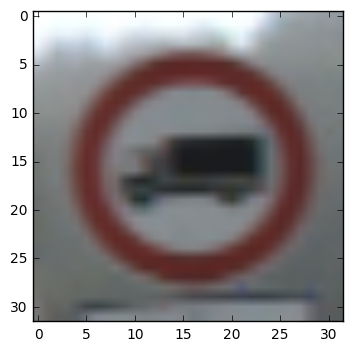

17


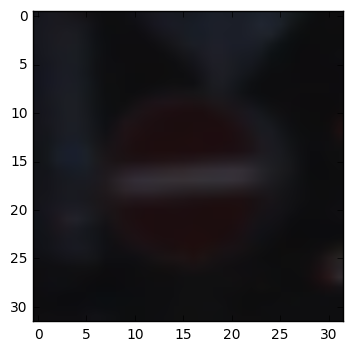

18


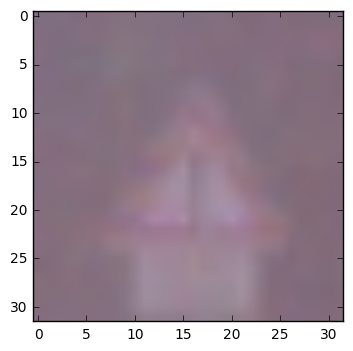

19


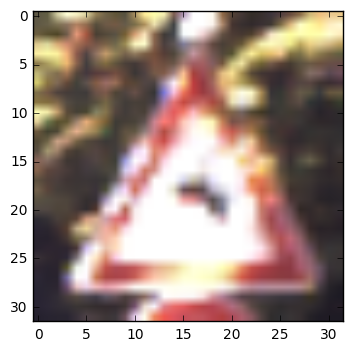

20


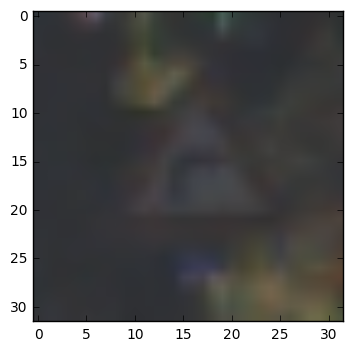

21


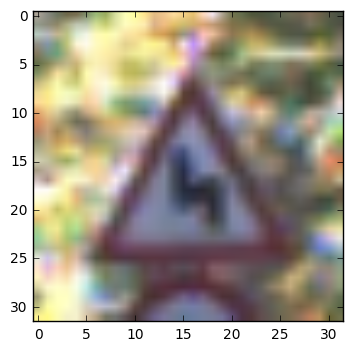

22


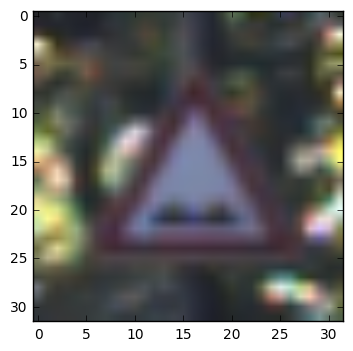

23


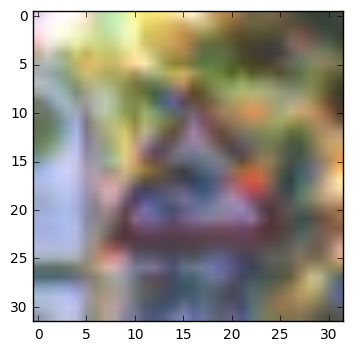

24


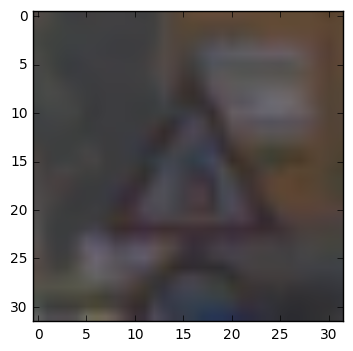

25


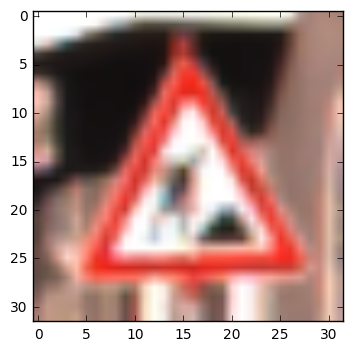

26


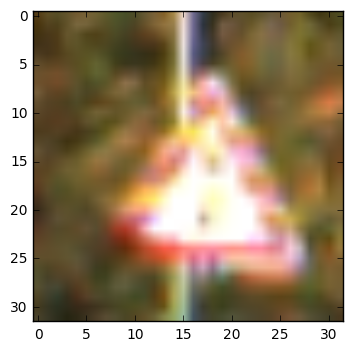

27


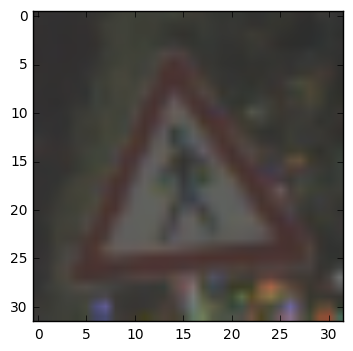

28


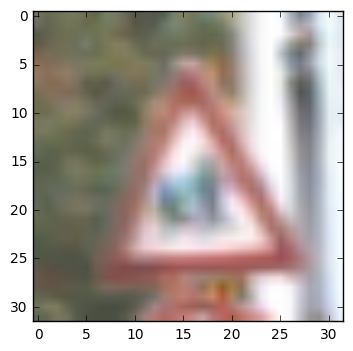

29


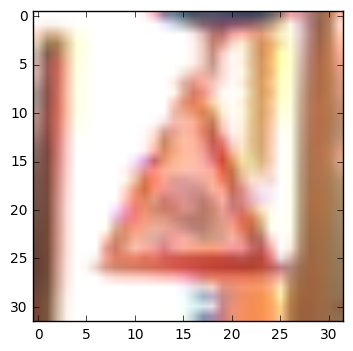

30


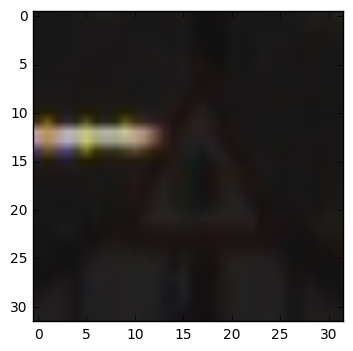

31


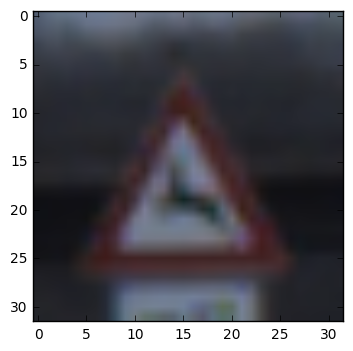

32


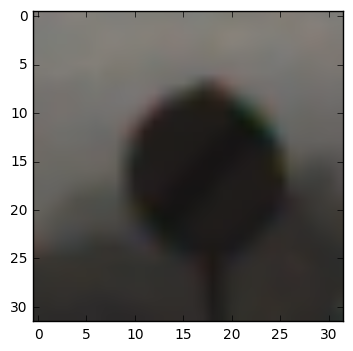

33


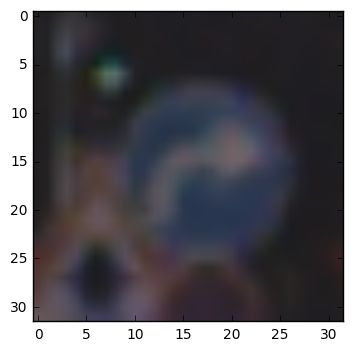

34


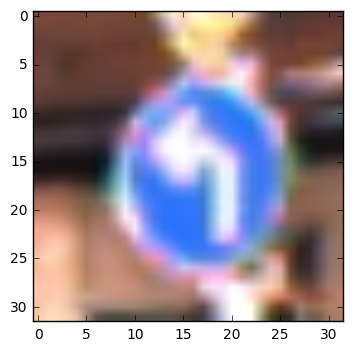

35


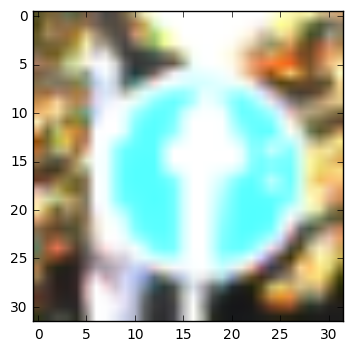

36


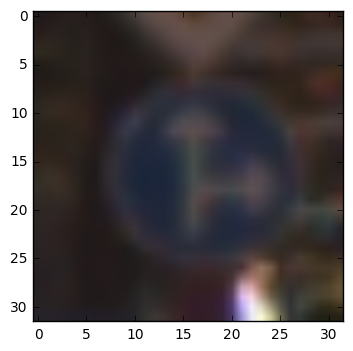

37


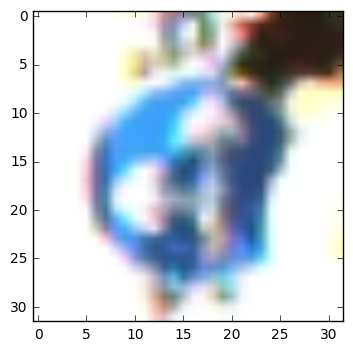

38


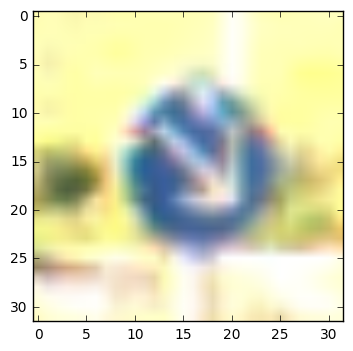

39


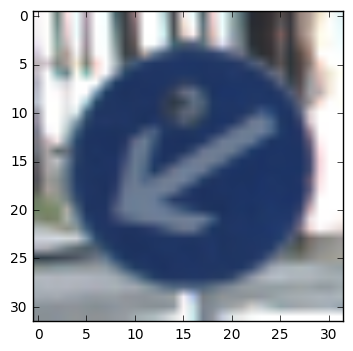

40


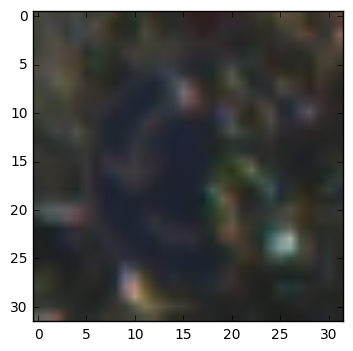

41


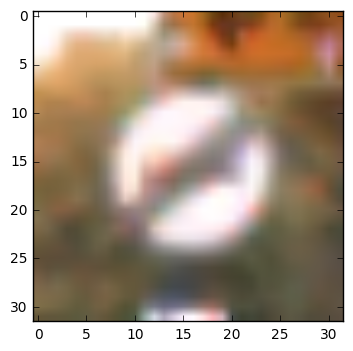

42


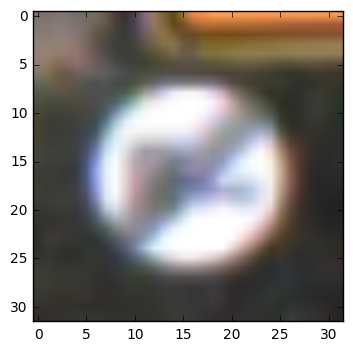

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


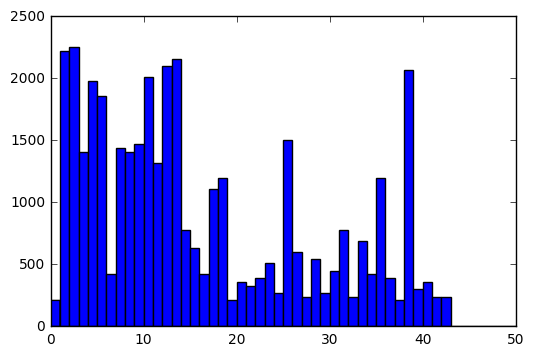

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
image = X_train[0]
"""
img_plot = plt.subplot(211)
img_plot.set_title('All images')
img_plot.imshow(image)
img_plot.set_ylim([32*7, 0])
img_plot.set_xlim([0, 32*7])
num_plot = plt.subplot(212)
num_plot.set_title('Label count')
#acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
#acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
#acc_plot.set_ylim([0, 1.0])
#acc_plot.set_xlim([batches[0], batches[-1]])
#acc_plot.legend(loc=4)

"""

print (y_train[0])
plt.imshow(image)
plt.show()
list_labels = []
#list_images = []
#list_images.append[image]

list_labels.append(y_train[0])

for i in range(len(y_train)):
    if not(y_train[i] in list_labels):
        list_labels.append(y_train[i])
        print (y_train[i])
        plt.imshow(X_train[i])
        plt.show()

print (list_labels)
plt.hist(y_train, bins=50, range=[0,50]);
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

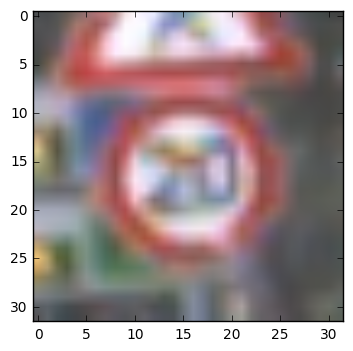

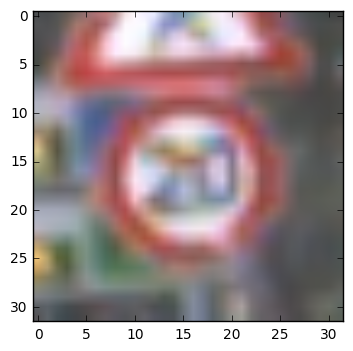

39209


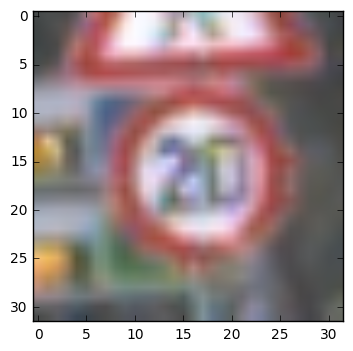

39209
(32, 32)


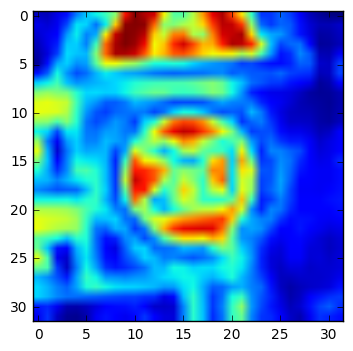

(39209, 43)
(39209, 32, 32, 1)


In [5]:
### Preprocess the data here

def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    Xmin = 0
    Xmax = 255
    return (image_data/255)
    #return (a + (image_data - Xmin)*(b - a)/(Xmax - Xmin))
    
def rgb2gray(image_data):
    
    image = np.mean(image_data, axis = 2)
    image = image[:,:, newaxis]
    
    return image

def hot_encoded(train):
    encoder = LabelBinarizer()
    encoder.fit(train)
    hot_encoded_labels = encoder.transform(train)
    #test_labels = encoder.transform(test_labels)

    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    hot_encoded_labels = hot_encoded_labels.astype(np.float32)
    #test_labels = test_labels.astype(np.float32)
    #is_labels_encod = True
    return hot_encoded_labels
plt.imshow(X_train[0])
plt.show()

y = X_train[0]/255
plt.imshow(y)
plt.show()
print (len(X_train))

tr = np.zeros(X_train.shape)
for i in range(len(X_train)):
    tr[i] = X_train[i]/255
plt.imshow(tr[1])
plt.show()


print(len(tr))

train_data = np.zeros((len(tr), 32, 32, 1))
for i in range(len(X_train)):
    train_data[i,:,:,:] = rgb2gray(tr[i])
del tr
x = np.squeeze(train_data[0], axis=(2,))
print (x.shape)
plt.imshow(x)
plt.show()


train_labels = hot_encoded(y_train)

print(train_labels.shape)

print (train_data.shape)
#"""





In [14]:
### All the parameters for the code
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [6]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Randomly divide the train data set into train and validation data sets

#X_train = X_train[:30000,:,:,:]
#y_train = y_train[:30000]
"""
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=832289)

X_train, X_test_data, y_train, y_test_data = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=832289)

print(len(X_train))
"""
train_data, X_valid, train_labels, y_valid = train_test_split(
    train_data,
    train_labels,
    test_size=0.1,
    random_state = 832289)

train_data, X_test_data, train_labels, y_test_data = train_test_split(
    train_data,
    train_labels,
    test_size=0.1,
    random_state = 832289)

print(train_data.shape)
print(train_labels.shape)
#
print(X_valid.shape)
print(y_valid.shape)
print(X_test_data.shape)
print(y_test_data.shape)


(31759, 32, 32, 1)
(31759, 43)
(3921, 32, 32, 1)
(3921, 43)
(3529, 32, 32, 1)
(3529, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [7]:
### Convoluted Neural Networks

### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

learning_rate = 0.001
batch_size = 128
training_epochs = 5
"""
#batch_x = train_data[128:256,:,:]
#batch_y = y_train[128:256]

if (batch_x[0].all() == train_data[0].all()):
    print ("YES")

print (batch_x.shape)
print (len(batch_y))
print (len(y_train))
print (y_train[0])
#plt.imshow(train_data[0])


batch_x = X_train[128:256,:,:]
batch_y = y_train[128:256]

if (batch_x[0].all() == X_train[0].all()):
    print ("YES")

print (batch_x.shape)
print (len(batch_y))
print (len(y_train))
print (y_train[0])
plt.imshow(X_train[0])
"""
#
#plt.show()
#print (batch_y[0])
#plt.imshow(batch_x[0])
#plt.show()

layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}

### Weights and Biases initialization

image_width = 32
image_height = 32
color_channels = 1

input = tf.placeholder(
    tf.float32,
    shape=[None, image_width, image_height, color_channels])


weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [4*4*128, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

In [14]:
### Deep Neural Network

import tensorflow as tf

learning_rate = 0.001
training_epochs = 20
batch_size = 128

#print (int(train_data/))

n_input = 32*32

layer_1 = 32
layer_2 = 64
layer_3 = 128
layer_4 = 512

weights = {
    'layer_1': tf.Variable(tf.random_normal([n_input, layer_1])),
    'layer_2': tf.Variable(tf.random_normal([layer_1, layer_2])),
    'layer_3': tf.Variable(tf.random_normal([layer_2, layer_3])),
    'layer_4': tf.Variable(tf.random_normal([layer_3, layer_4])),
    'out': tf.Variable(tf.random_normal([layer_4, n_classes]))
}

biases = {
    'layer_1': tf.Variable(tf.zeros([layer_1])),
    'layer_2': tf.Variable(tf.zeros([layer_2])),
    'layer_3': tf.Variable(tf.zeros([layer_3])),
    'layer_4': tf.Variable(tf.zeros([layer_4])),
    'out': tf.Variable(tf.zeros([n_classes]))
}

x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

keep_prob = tf.placeholder(tf.float32)

x_flat = tf.reshape(x, [-1, n_input])

### layer_1 = xW + b -> relu -> logits = xW + b

first_layer = tf.add(tf.matmul(x_flat, weights['layer_1']), biases['layer_1'])
first_layer = tf.nn.relu(first_layer)
# Output layer with linear activation

first_layer = tf.nn.dropout(first_layer, keep_prob)

second_layer = tf.add(tf.matmul(first_layer, weights['layer_2']), biases['layer_2'])
second_layer = tf.nn.relu(second_layer)

second_layer = tf.nn.dropout(second_layer, keep_prob)

third_layer = tf.add(tf.matmul(second_layer, weights['layer_3']), biases['layer_3'])
third_layer = tf.nn.relu(third_layer)

third_layer = tf.nn.dropout(third_layer, keep_prob)

fourth_layer = tf.add(tf.matmul(third_layer, weights['layer_4']), biases['layer_4'])
fourth_layer = tf.nn.relu(fourth_layer)

logits = tf.add(tf.matmul(fourth_layer, weights['out']), biases['out'])

#return (a + (image_data - Xmin)*(b - a)/(Xmax - Xmin))


#maxi = tf.reduce_max(logits)
#mini = tf.reduce_min(logits)

#logits = tf.add(tf.div(tf.mul(tf.sub(logits, mini), 0.8),(maxi - mini)), 0.1)
"""
prediction = tf.nn.softmax(logits)
#shape = prediction.get_shape()
#su_m = tf.reduce_sum(y, reduction_indices=1)
log_pred = tf.log(prediction)
cross_entropy = -tf.reduce_sum(tf.mul(y, log_pred), reduction_indices=1)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()

batch_x = train_data[249*batch_size:250*batch_size,:,:,:]
print(batch_x.shape)
batch_y = train_labels[249*batch_size:250*batch_size,:]

with tf.Session() as sess:
    sess.run(init)
    c = sess.run(cost, feed_dict = {x: batch_x, y: batch_y})
    l = sess.run(x_flat, feed_dict = {x: batch_x})
    q = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    print (l)
    print(c)
    print (q)
"""
#prediction = tf.nn.softmax(logits)

# Cross entropy
#cross_entropy = -tf.reduce_sum(y * tf.log(prediction), reduction_indices=1)

# Training loss
#cost = tf.reduce_mean(cross_entropy)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    
    sess.run(init)
    
    batch_x = train_data[:batch_size,:,:,:]
            #batch_x = X_train[i*batch_size:(i+1)*batch_size,:,:,:]
    batch_y = train_labels[:batch_size,:]
    c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
    print (c)
    
    
    for epoch in range(training_epochs):
        
        total_batch = int(len(train_data)/batch_size)+1
        # Loop over all batches
        for i in range(total_batch):
            
            batch_x = train_data[i*batch_size:(i+1)*batch_size,:,:,:]
            #batch_x = X_train[i*batch_size:(i+1)*batch_size,:,:,:]
            batch_y = train_labels[i*batch_size:(i+1)*batch_size,:]
            # Run optimization op (backprop) and cost op (to get loss value)
            #m = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            #print ("Batch No: ", i, "cost = ",m)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        print("Epoch:", '%04d' % (epoch+1), "cost=", c)#"{:.9f}".format(c))
        
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy:",
        accuracy.eval({x: X_valid, y: y_valid, keep_prob: 1.0}))


241042.0
Epoch: 0001 cost= 3.74904
Epoch: 0002 cost= 3.73559
Epoch: 0003 cost= 3.73082
Epoch: 0004 cost= 3.73498
Epoch: 0005 cost= 3.73811
Epoch: 0006 cost= 3.74027
Epoch: 0007 cost= 3.74139
Epoch: 0008 cost= 3.742
Epoch: 0009 cost= 3.74198
Epoch: 0010 cost= 3.74126
Epoch: 0011 cost= 3.74035
Epoch: 0012 cost= 3.73967
Epoch: 0013 cost= 3.73896
Epoch: 0014 cost= 3.73832
Epoch: 0015 cost= 3.73776
Epoch: 0016 cost= 3.73727
Epoch: 0017 cost= 3.73686
Epoch: 0018 cost= 3.73648
Epoch: 0019 cost= 3.73752
Epoch: 0020 cost= 3.73928
Accuracy: 0.0566182


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Functions for conv nets

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def conv_net(x, weights, biases):
    # Layer 1 - 28*28*1 to 14*14*32
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    # Layer 3 - 7*7*64 to 4*4*128
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3)

    # Fully connected layer - 4*4*128 to 512
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction - 512 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

### Main code

x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(len(train_data)/batch_size)+1
        # Loop over all batches
        for i in range(total_batch):
            batch_x = train_data[i*batch_size:(i+1)*batch_size,:,:,:]
            #batch_x = X_train[i*batch_size:(i+1)*batch_size,:,:,:]
            batch_y = train_labels[i*batch_size:(i+1)*batch_size,:]
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", c)#"{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy:",
        accuracy.eval({x: X_valid, y: y_valid}))


Epoch: 0001 cost= 30.9362
Epoch: 0002 cost= 20.5999
Epoch: 0003 cost= 18.1845
Epoch: 0004 cost= 15.2762
Epoch: 0005 cost= 12.2996
Optimization Finished!
Accuracy: 0.0453966


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.